# Cálculo del PERT de un proyecto

## Datos de partida del PERT

In [1]:
import pandas as pd

In [2]:
datos_pert = pd.DataFrame({ 'A':  (1, 2, 3),
                            'B':  (1, 3, 2),
                            'C':  (2, 3, 7),
                            'D':  (2, 4, 5),
                            'E':  (3, 5, 6),
                            'F':  (3, 6, 7),
                            'G':  (4, 5, 4),
                            'H':  (5, 6, 4),
                            'f1': (1, 5, 0),
                            'f2': (2, 5, 0),
                          },
                          index=['nodo_inicial','nodo_final','duracion']).T
datos_pert

,nodo_inicial,nodo_final,duracion
A,1,2,3
B,1,3,2
C,2,3,7
D,2,4,5
E,3,5,6
F,3,6,7
G,4,5,4
H,5,6,4
f1,1,5,0
f2,2,5,0


## Cálculo usando Python
### Importamos librerías de Python.
En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [3]:
from IPython.display import Image
from pmule import PertGraph


### La clase PertGraph permite calcular y visualizar el PERT

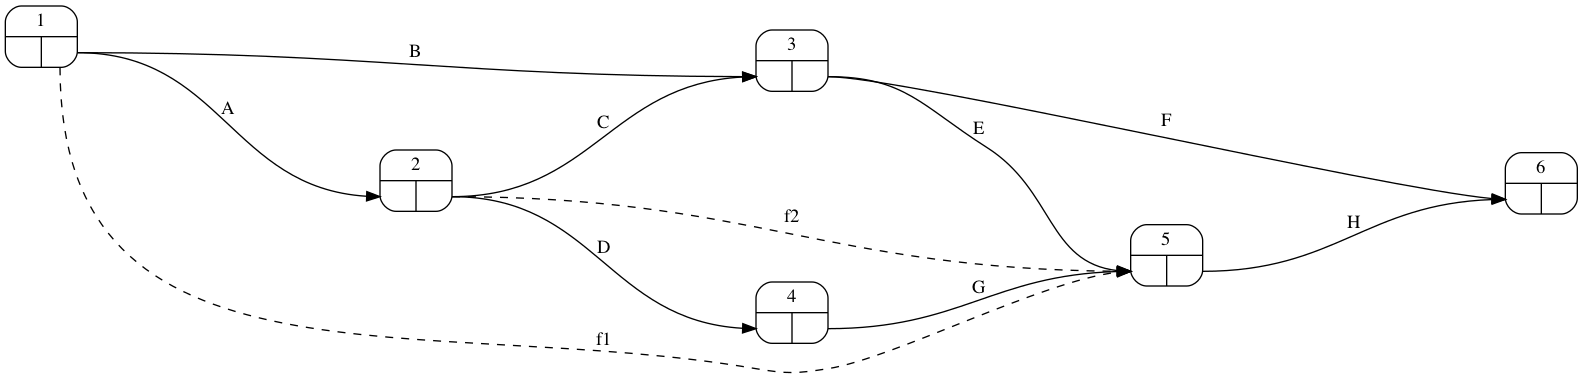

In [36]:
pert = PertGraph(datos_pert)

filename='pert_en_blanco.png'
pert.write_dot(filename=filename, orientation='portrait', tiempos=False, ranksep=3, nodesep=0.5)
Image(filename)

### Matriz de Zaderenko 

In [40]:
pert.zaderenko()

,1,2,3,4,5,6,temprano
1,,3,2,,,,0
2,,,7,5,,,3
3,,,,,6,7,10
4,,,,,4,,8
5,,,,,,4,16
6,,,,,,,20
tardio,0,3,10,12,16,20,


In [41]:
pert.tiempos()

,1,2,3,4,5,6
tardio,0,3,10,12,16,20
temprano,0,3,10,8,16,20


In [42]:
pert.duracion()

20

In [43]:
pert.holguras()

,H_total
nombre,
A,0
B,8
f1,16
C,0
D,4
f2,13
E,0
F,3
G,4


In [44]:
pert.camino_critico()

{'Actividades': ['A', 'C', 'E', 'H'], 'Nodos': [1, 2, 3, 5, 6]}

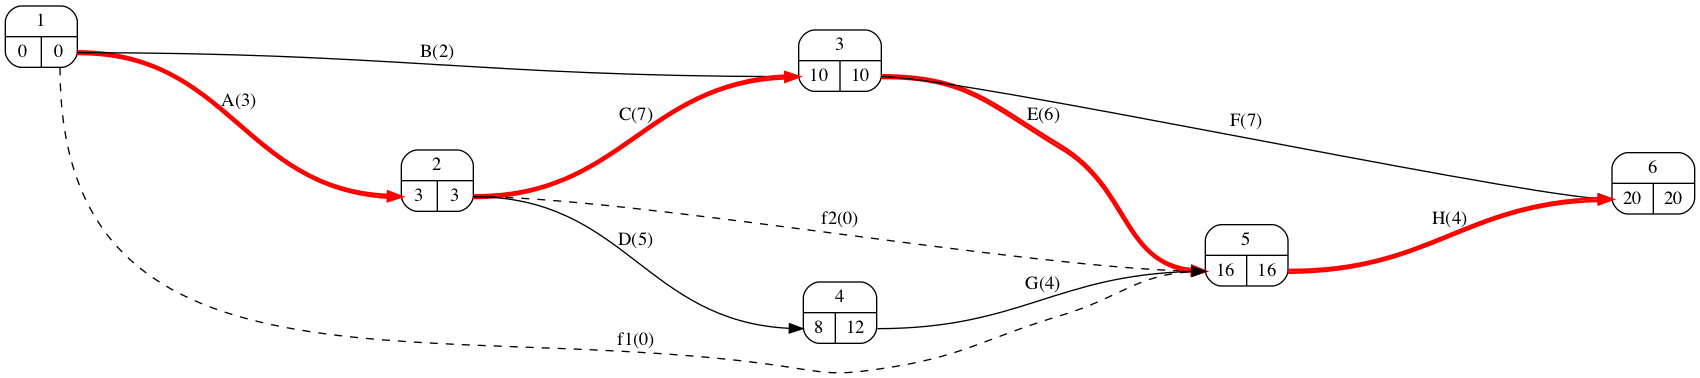

In [35]:
filename='pert_resuelto.png'
pert.write_dot(filename=filename, orientation='portrait', tiempos=True, ranksep=3, nodesep=0.5)
Image(filename)